In [1]:
import pandas as pd

"""Project Title: Exploring Regional House Price Dynamics and Property Type Trends in the UK 
Housing Market"""

#Load the dataset 

File_path =r"C:\Users\Ruwan Hasitha\OneDrive - University of Hertfordshire\Final project\UK-HPI-full-file-2024-03.csv"
df = pd.read_csv(File_path)

#Print basic information of dataset 

print(df.info())
print (df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140580 entries, 0 to 140579
Data columns (total 54 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    140580 non-null  object 
 1   RegionName              140580 non-null  object 
 2   AreaCode                140580 non-null  object 
 3   AveragePrice            140580 non-null  float64
 4   Index                   140580 non-null  float64
 5   IndexSA                 4929 non-null    float64
 6   1m%Change               140156 non-null  float64
 7   12m%Change              135768 non-null  float64
 8   AveragePriceSA          4929 non-null    float64
 9   SalesVolume             136113 non-null  float64
 10  DetachedPrice           134031 non-null  float64
 11  DetachedIndex           134031 non-null  float64
 12  Detached1m%Change       133641 non-null  float64
 13  Detached12m%Change      129375 non-null  float64
 14  SemiDetachedPrice   

In [2]:
#Handling missing values in dataset

df = df.dropna()

#convert 'Date' column to datetime type
df['Date']= pd.to_datetime(df['Date'])

#Extract the year and month 

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [3]:
#filter out regions which include boder regions like "Great Britain ,England and Wales ,and England"

fillterd_df = df[~df['RegionName'].isin(['Great Britain','England','England and Wales'])]

#Verify by checking unique values in the 'RegionName' column after filtering  

fillterd_unique_regions = fillterd_df['RegionName'].unique()

#Display unique regions and the total number of unique regions 

print (fillterd_unique_regions)
print (len(fillterd_unique_regions))

['East Midlands' 'East of England' 'London' 'North East' 'North West'
 'Scotland' 'South East' 'South West' 'Wales' 'West Midlands Region'
 'Yorkshire and The Humber']
11


In [4]:
#Define the standerd 12 regions in the UK

standard_regions =[
    'London', 'South East', 'South West', 'East of England', 'West Midlands',
    'East Midlands', 'Yorkshire and The Humber', 'North West', 'North East',
    'Wales', 'Scotland', 'Northern Ireland'
]

#Filter the dataset to get only the standard regions 

df_standard = df[df['RegionName'].isin(standard_regions)]

#Summmery

print(df_standard.describe())

        AveragePrice        Index      IndexSA    1m%Change   12m%Change  \
count    1330.000000  1330.000000  1330.000000  1330.000000  1330.000000   
mean   227763.509607   118.712070   117.627272     0.373184     4.552511   
std    103140.903734    18.284887    18.118966     1.445838     4.135328   
min    112007.912300    77.290881    77.240070    -8.300000    -4.700000   
25%    149617.189050   104.201921   102.920419    -0.315072     1.684251   
50%    193580.930650   117.934668   117.093399     0.408238     4.048460   
75%    288054.560500   129.722548   128.481478     1.100000     6.729058   
max    542387.000000   162.000000   159.600000     8.400000    20.555012   

       AveragePriceSA   SalesVolume  DetachedPrice  DetachedIndex  \
count     1330.000000   1330.000000   1.330000e+03    1330.000000   
mean    226055.366369   7384.771429   3.790988e+05     119.247179   
std     103245.261717   3296.005374   2.026755e+05      18.493909   
min     110711.944000   1003.000000   1

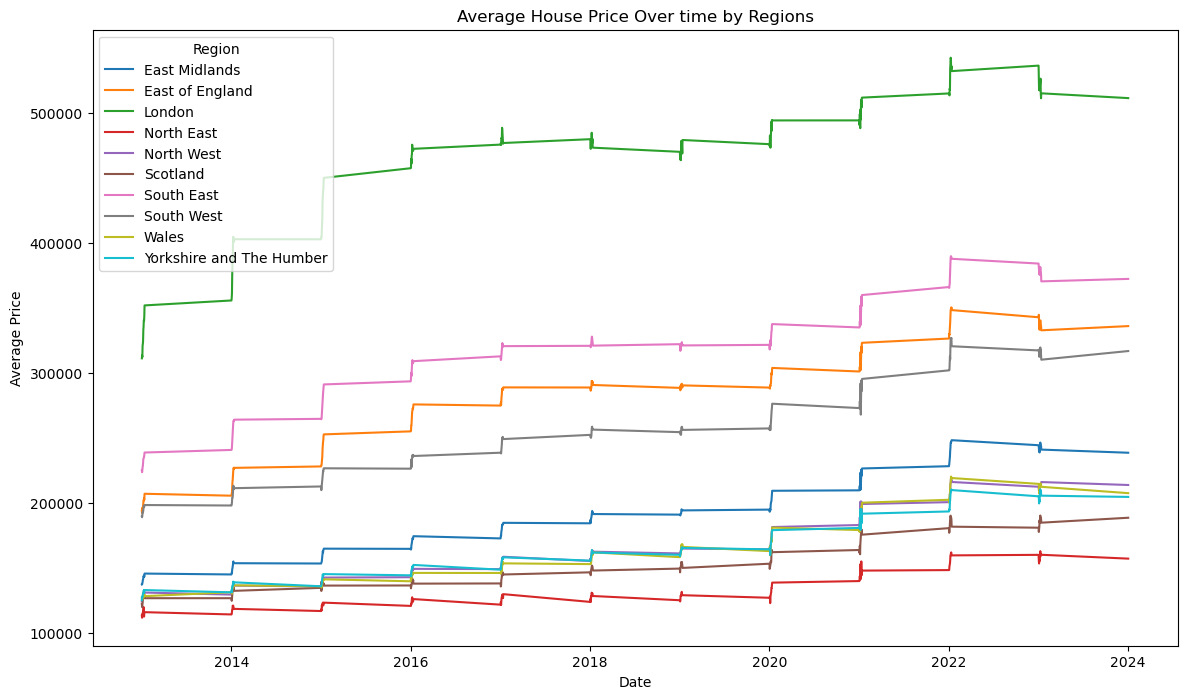

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#Make line plot of average prices over time for different regions

plt.figure(figsize= (14,8))
sns.lineplot(data=df_standard, x='Date', y='AveragePrice', hue= 'RegionName')
plt.title('Average House Price Over time by Regions')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend(title='Region')
plt.show()

C:\Users\Ruwan Hasitha\AppData\Local\Temp\ipykernel_6184\4122914390.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



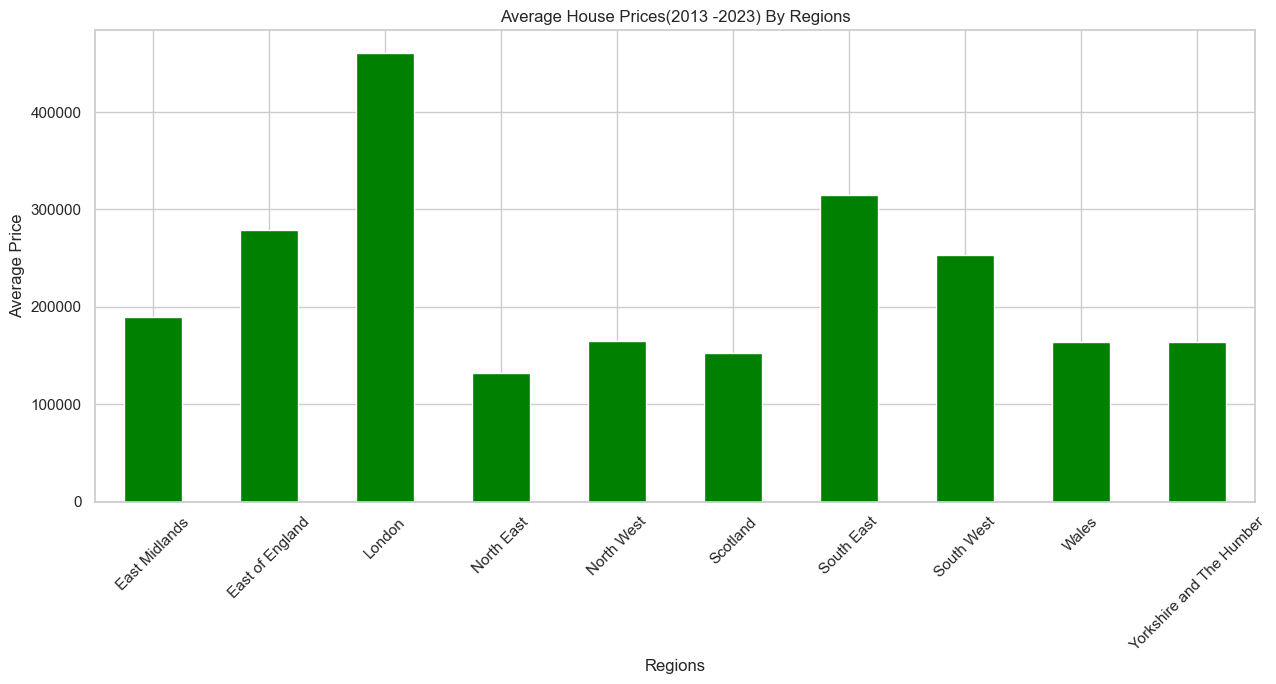

In [61]:
#Convert 'Date' to datetime format and filter for the year 2013 to 2023
df_standard['Date'] = pd.to_datetime(df_standard['Date'])
filterd_df = df_standard[(df_standard['Date'].dt.year >=2013) & (df_standard['Date'].dt.year <=2023)]

#Calculate the average for all regions over the time

average_prices = filterd_df.groupby('RegionName')['AveragePrice'].mean().reindex(standard_regions)

#Plot the bar chart 
plt.figure(figsize =(13,7))
average_prices.plot(kind ='bar', color = 'green')
plt.title('Average House Prices(2013 -2023) By Regions')
plt.xlabel('Regions')
plt.ylabel('Average Price')
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

C:\Users\Ruwan Hasitha\AppData\Local\Temp\ipykernel_6184\4139654642.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



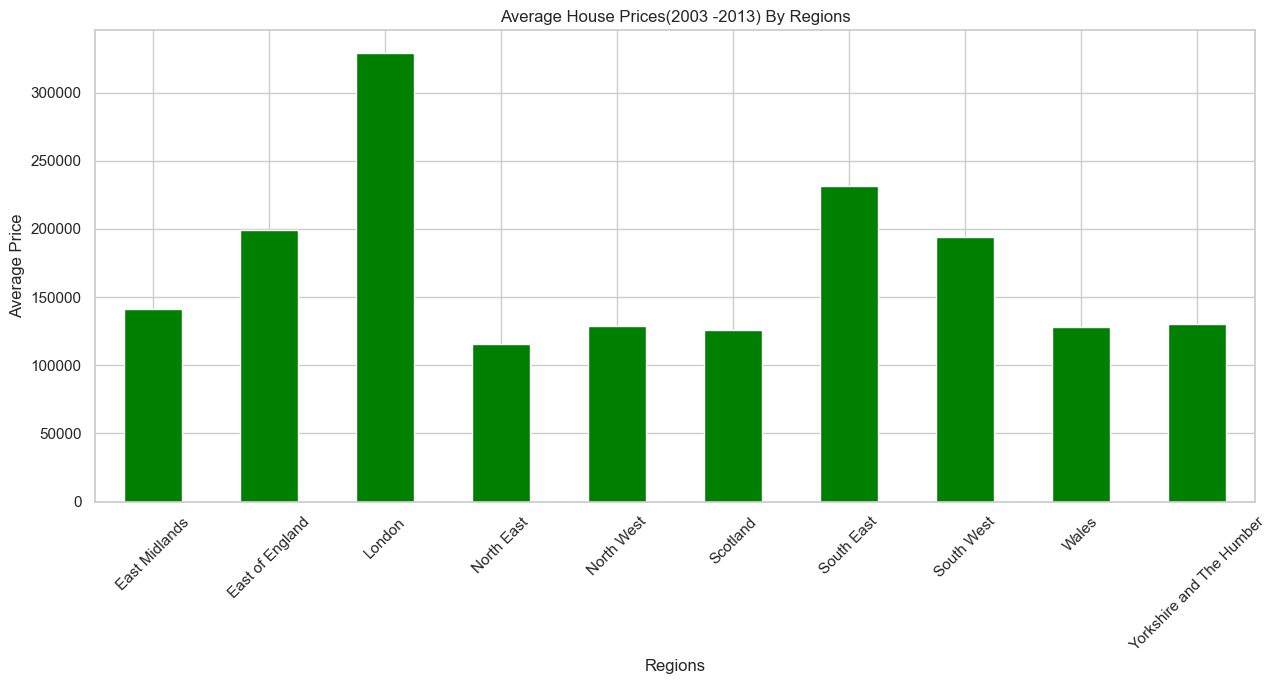

In [60]:
#Convert 'Date' to datetime format and filter for the year 2013 to 2023
df_standard['Date'] = pd.to_datetime(df_standard['Date'])
filterd_df = df_standard[(df_standard['Date'].dt.year >=2003) & (df_standard['Date'].dt.year <=2013)]

#Calculate the average for all regions over the time

average_prices = filterd_df.groupby('RegionName')['AveragePrice'].mean().reindex(standard_regions)

#Plot the bar chart 
plt.figure(figsize =(13,7))
average_prices.plot(kind ='bar', color = 'green')
plt.title('Average House Prices(2003 -2013) By Regions')
plt.xlabel('Regions')
plt.ylabel('Average Price')
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

In [11]:

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
from dash import html
import dash_html_components as html

In [15]:

# Convert 'Date' to datetime format
df_standard['Date'] = pd.to_datetime(df_standard['Date'])

#filter two different datafreame 
filterd_df_2003_2013 = df_standard.loc[(df_standard['Date'].dt.year >=2003) & (df_standard['Date'].dt.year <=2013)]
filterd_df_2013_2023 = df_standard.loc[(df_standard['Date'].dt.year >=2013) & (df_standard['Date'].dt.year <=2023)]



C:\Users\Ruwan Hasitha\AppData\Local\Temp\ipykernel_6184\940721788.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
#Replace 'standard_regions' with the unique regions present in data
standard_regions =df_standard['RegionName'].unique()

#Calculate the average for all regions over the time

average_prices_2003_2013 = filterd_df_2003_2013.groupby('RegionName')['AveragePrice'].mean().reindex(standard_regions)
average_prices_2013_2023 = filterd_df_2013_2023.groupby('RegionName')['AveragePrice'].mean().reindex(standard_regions)

In [18]:
# Initialize Dash app
app = dash.Dash(__name__)

#Layout of the dashboard
app.layout =html.Div([
      html.H1("Average House Price by Region"),
    
   #First plot for 2002-2013
    html.Div([
        html.H2("2003-2013"),
        dcc.Graph(
        id='bar-chart-2003-2013',
        figure=px.bar(
           x= average_prices_2003_2013.index,
           y= average_prices_2003_2013.values,
           labels={'x': 'Region','y': 'Average Price'},
           title='Average House Prices (2003-2013) By Region'
           ).update_layout(
               xaxis_tickangle=-45
               
           )
        )
    ]),
#Second plot for 2013-2023
    html.Div([
        html.H2('2013-2023'),
        dcc.Graph(
            id='bar-chart-2013-2023',
            figure=px.bar(
                x= average_prices_2013_2023.index,
                y= average_prices_2013_2023.values,
                labels={'x': 'RegionS','y': 'Average Price'},
                title='Average House Prices (2013-2023) By Region'
           ).update_layout(
               xaxis_tickangle=-45
               
                
            )
        )
    ])
    
])

#Run the dashboard in different port 
if __name__ == '__main__':
    app.run_server(debug=True,port =8060)


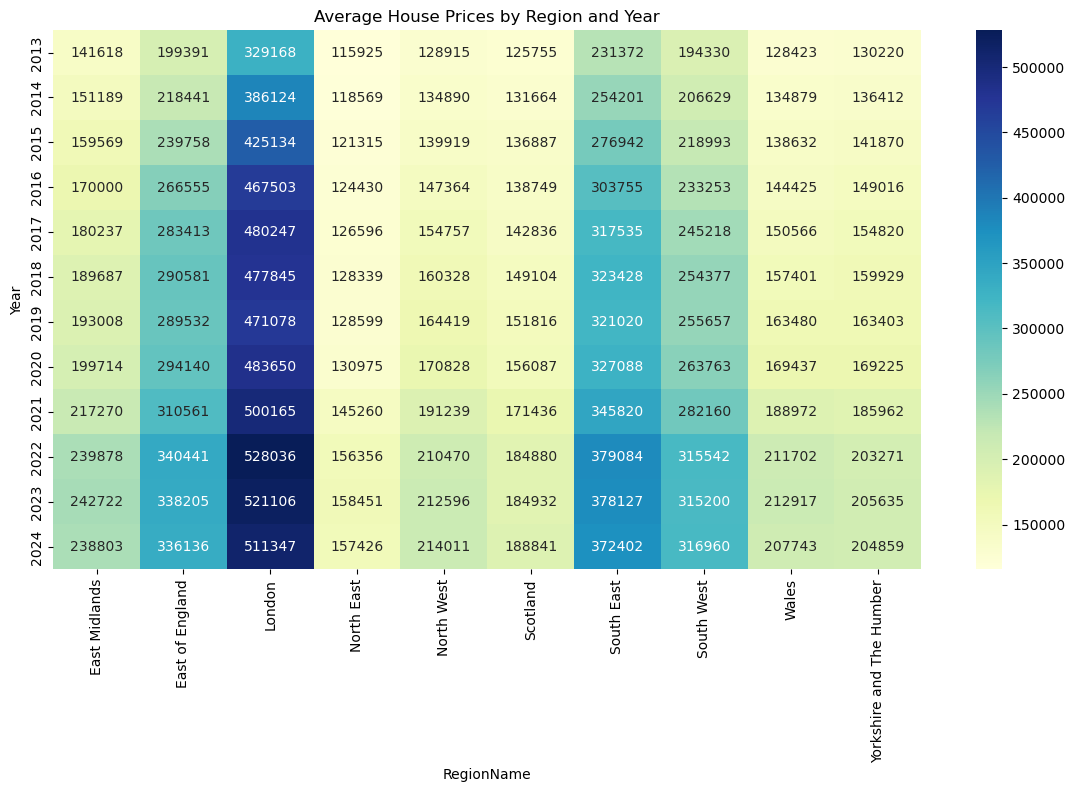

In [19]:
# Create Heatmap of average prices by region and year
pivot_table = df.pivot_table(values='AveragePrice', index='Year', columns='RegionName', aggfunc='mean')
pivot_table = pivot_table.reindex(columns=standard_regions)
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Average House Prices by Region and Year')
plt.show()

In [20]:
#Filter for the last 10 years

df_filtered = df[(df['Date'].dt.year >= 2013) & (df['Date'].dt.year <= 2023)]
print(df_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848 entries, 38184 to 140576
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    1848 non-null   datetime64[ns]
 1   RegionName              1848 non-null   object        
 2   AreaCode                1848 non-null   object        
 3   AveragePrice            1848 non-null   float64       
 4   Index                   1848 non-null   float64       
 5   IndexSA                 1848 non-null   float64       
 6   1m%Change               1848 non-null   float64       
 7   12m%Change              1848 non-null   float64       
 8   AveragePriceSA          1848 non-null   float64       
 9   SalesVolume             1848 non-null   float64       
 10  DetachedPrice           1848 non-null   float64       
 11  DetachedIndex           1848 non-null   float64       
 12  Detached1m%Change       1848 non-null   fl

In [21]:
#Group by year to get average prices for pour different property types 

group_df = df_filtered.groupby('Year').agg({
    'DetachedPrice': 'mean',
    'SemiDetachedPrice':'mean',
    'TerracedPrice' : 'mean',
    'FlatPrice' : 'mean',
    
}).reset_index()


In [22]:
#Melt the dataframe for make platting with seaborn 

melt_df = group_df.melt(id_vars =['Year'], value_vars =['DetachedPrice','SemiDetachedPrice','TerracedPrice','FlatPrice'],
                       
            var_name = 'PropertyType', value_name = 'AveragePrice')

#Set the style for plot
sns.set(style="whitegrid")

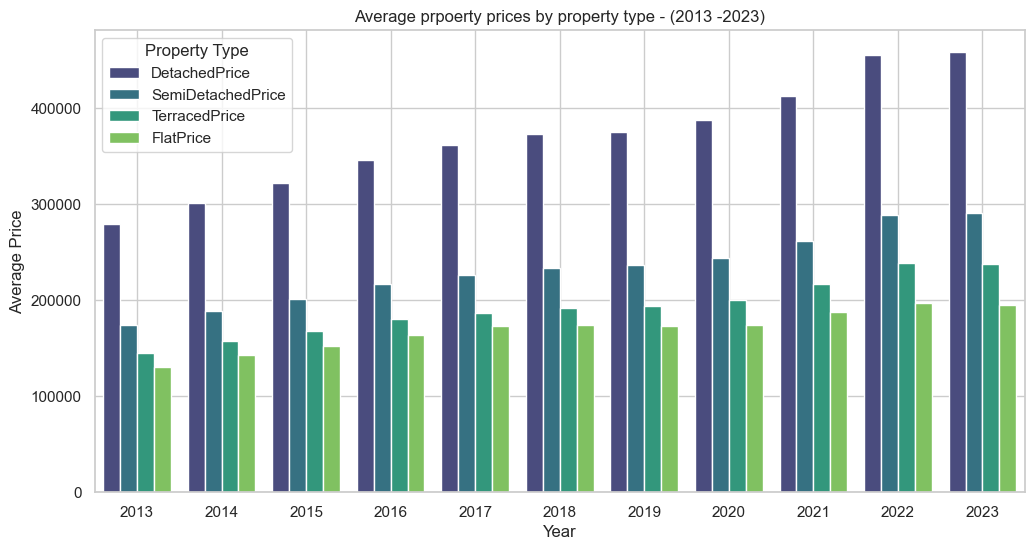

In [23]:
#Create the bar chart

plt.figure(figsize= (12,6))
sns.barplot(data =melt_df, x= 'Year', y= 'AveragePrice', hue= 'PropertyType', palette ='viridis')

#Add title and labels to bar chart 

plt.title('Average prpoerty prices by property type - (2013 -2023)')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title= 'Property Type')
plt.grid(True)

#Show the result of bar chart 
plt.show()


In [24]:
pip install pandas plotly dash

Note: you may need to restart the kernel to use updated packages.


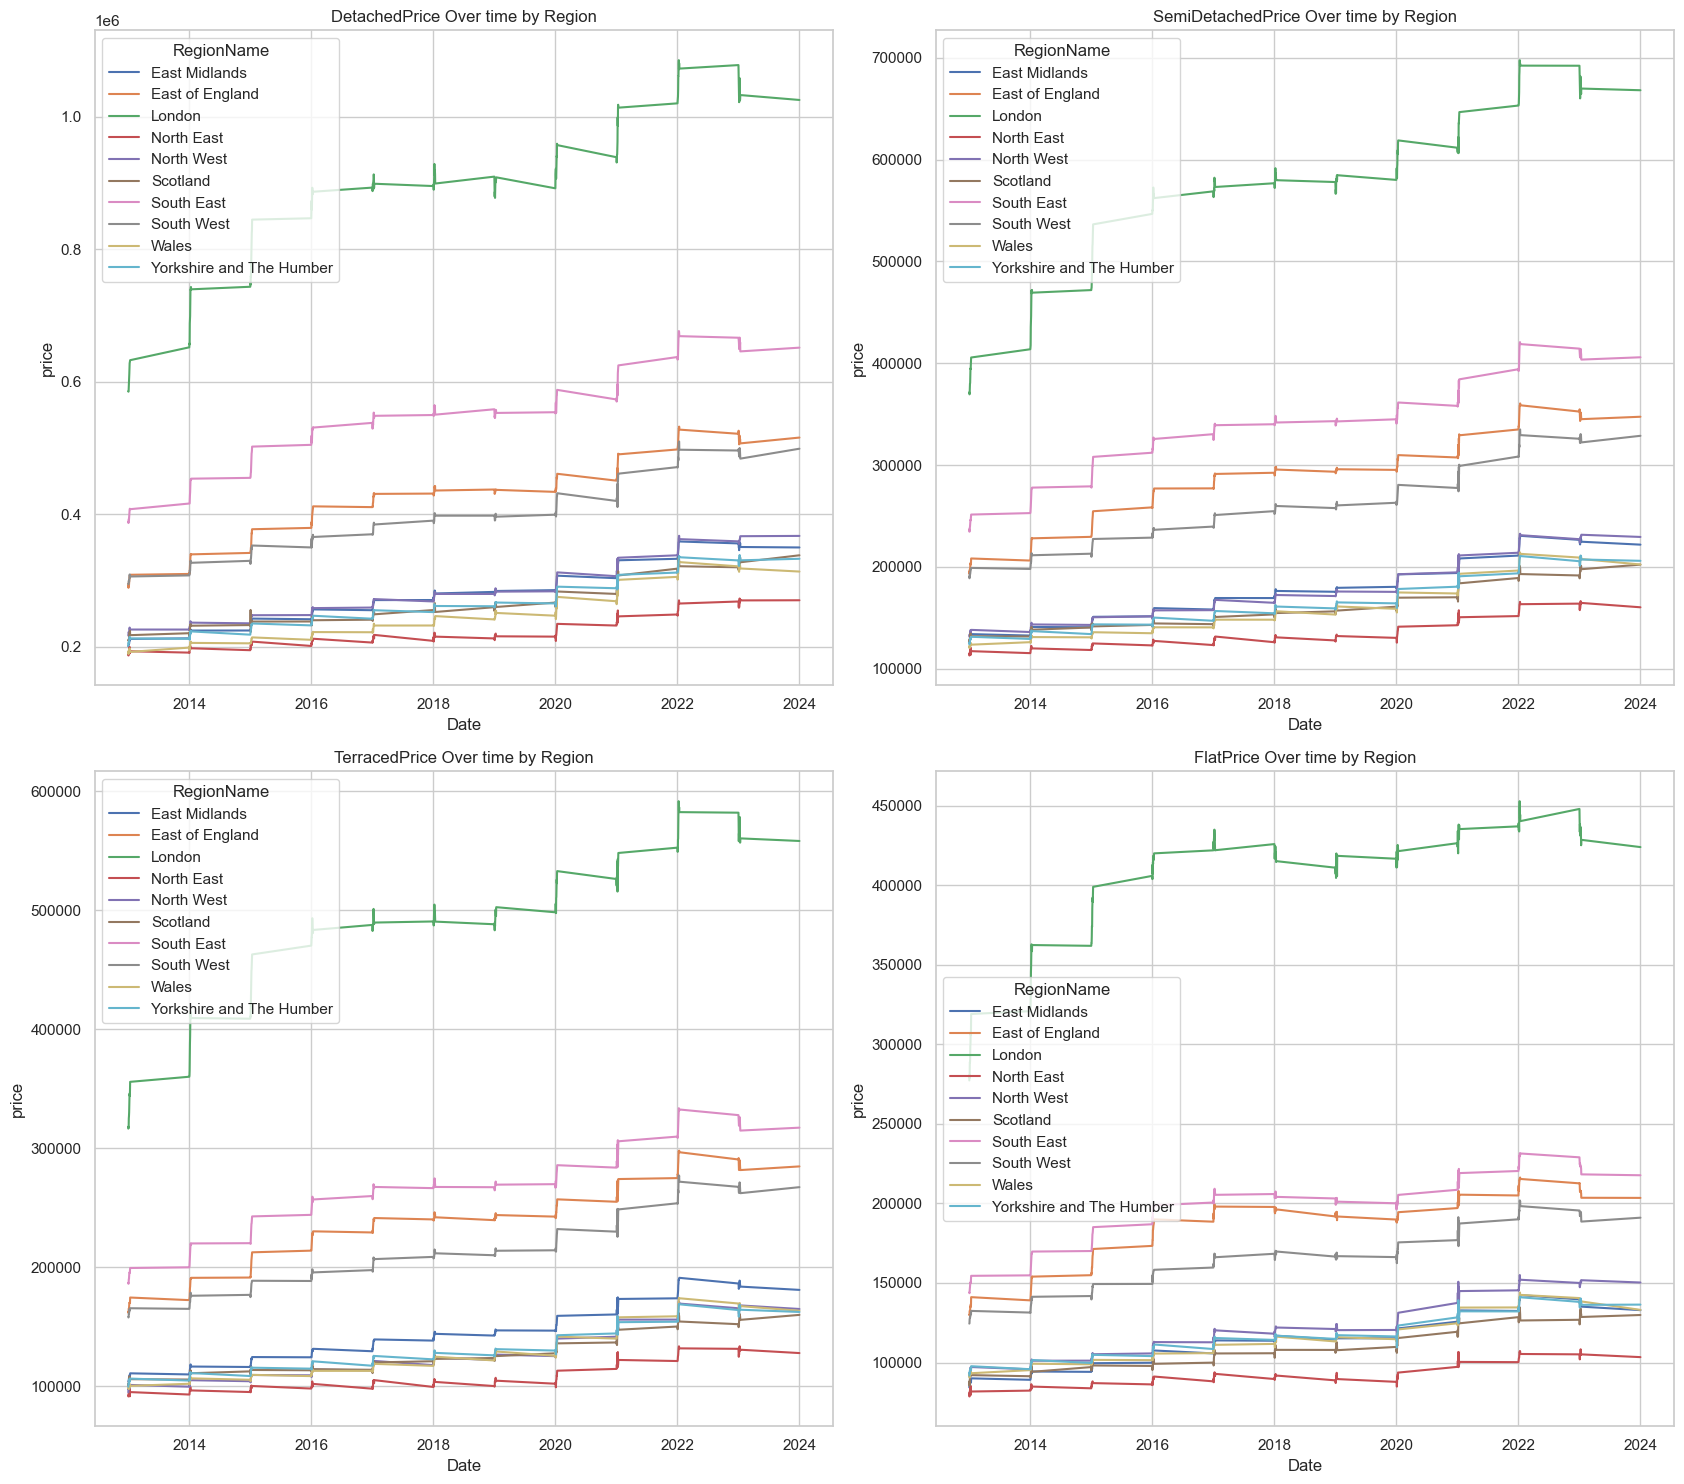

In [25]:
#Define property types 

property_types = [ 'DetachedPrice', 'SemiDetachedPrice','TerracedPrice','FlatPrice']

# Create a one figure with four different subplots for property types 
fig, axes = plt.subplots(2,2, figsize =(17,15))

#Flatten the axes array for easy iteration 
axes = axes.flatten()


#Make a loop for create subplots to each property type 

for i, prop in enumerate (property_types):
                 sns.lineplot(data=df_standard, x= 'Date', y=prop, hue='RegionName', ax =axes[i] )
                 axes[i].set_title(f'{prop} Over time by Region')
                 axes[i].set_xlabel('Date')
                 axes[i].set_ylabel('price')
                
#Adjust layout
plt.tight_layout()
plt.show()


In [27]:
#Trend analysis for average house price by purchase Method 

#Filter relavant coloumns from dataset
Sales_Trends = ['Year','CashPrice','MortgagePrice','CashSalesVolume','MortgageSalesVolume']
df_filtered_Sales = df[Sales_Trends]

#Remove any rows with missing values in the coumn of interest 

df_filtered_Sales = df_filtered_Sales.dropna()

In [28]:
#Aggregate data by year to calculate mean values 

yearly_data = df_filtered_Sales.groupby('Year').mean().reset_index()

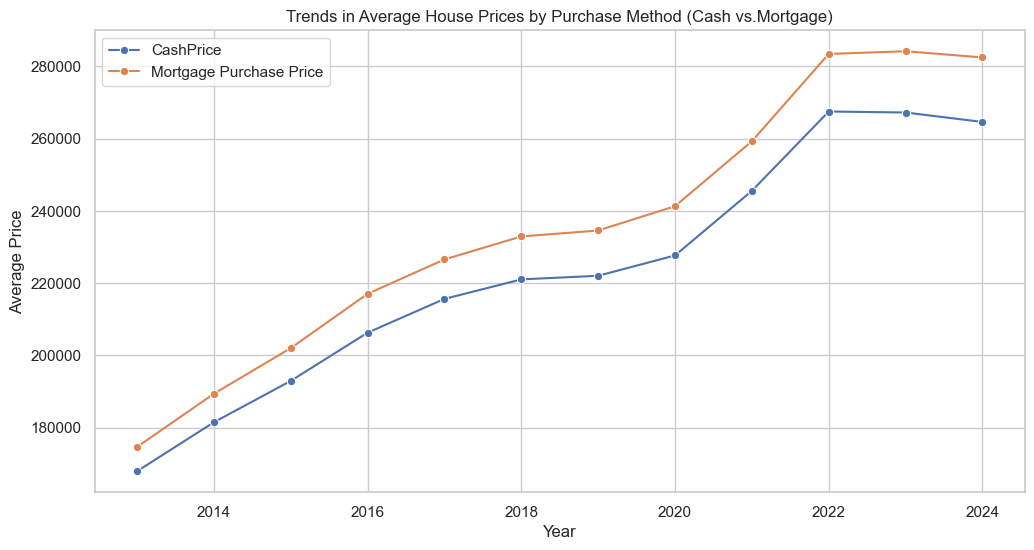

In [29]:
#Create plots trends in average price 

plt.figure(figsize=(12,6))
sns.lineplot(data =yearly_data, x='Year', y='CashPrice',label= 'CashPrice', marker ='o')
sns.lineplot(data =yearly_data, x='Year', y='MortgagePrice',label = 'Mortgage Purchase Price', marker ='o')
plt.title('Trends in Average House Prices by Purchase Method (Cash vs.Mortgage)')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

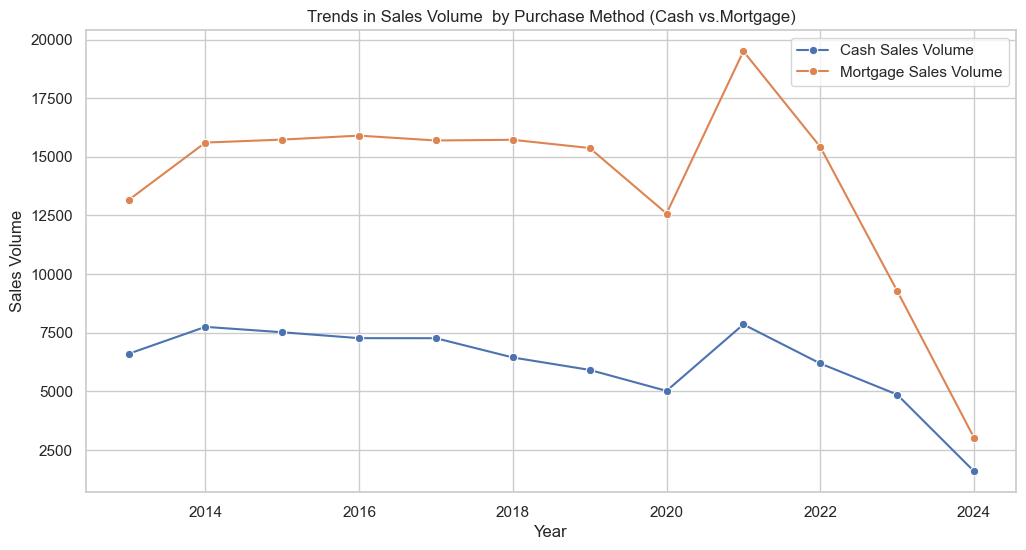

In [30]:
#Trend analysis for  Sales values by purchase Method 
#Plot trends in sales volume
plt.figure(figsize=(12,6))
sns.lineplot(data =yearly_data, x='Year', y='CashSalesVolume',label= 'Cash Sales Volume', marker ='o')
sns.lineplot(data =yearly_data, x='Year', y='MortgageSalesVolume',label = 'Mortgage Sales Volume', marker ='o')
plt.title('Trends in Sales Volume  by Purchase Method (Cash vs.Mortgage)')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.legend()
plt.grid(True)
plt.show()

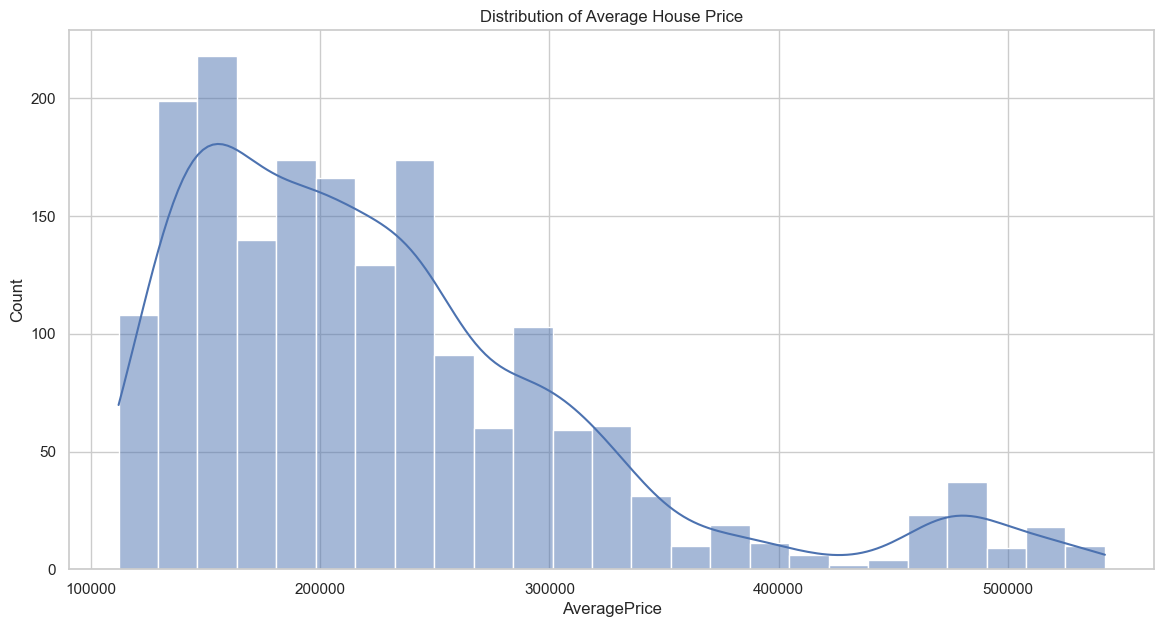

In [31]:
#Create Distribution of house prices 
plt.figure(figsize = (14,7))
sns.histplot(data=df, x= 'AveragePrice', kde=True)
plt.title('Distribution of Average House Price')
plt.show()

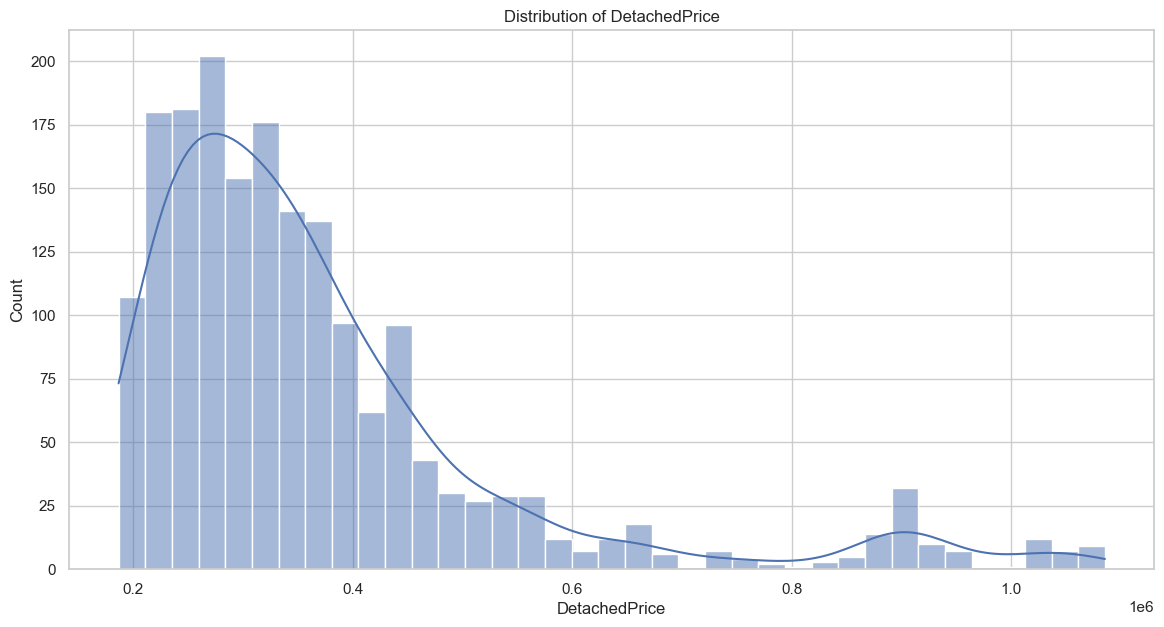

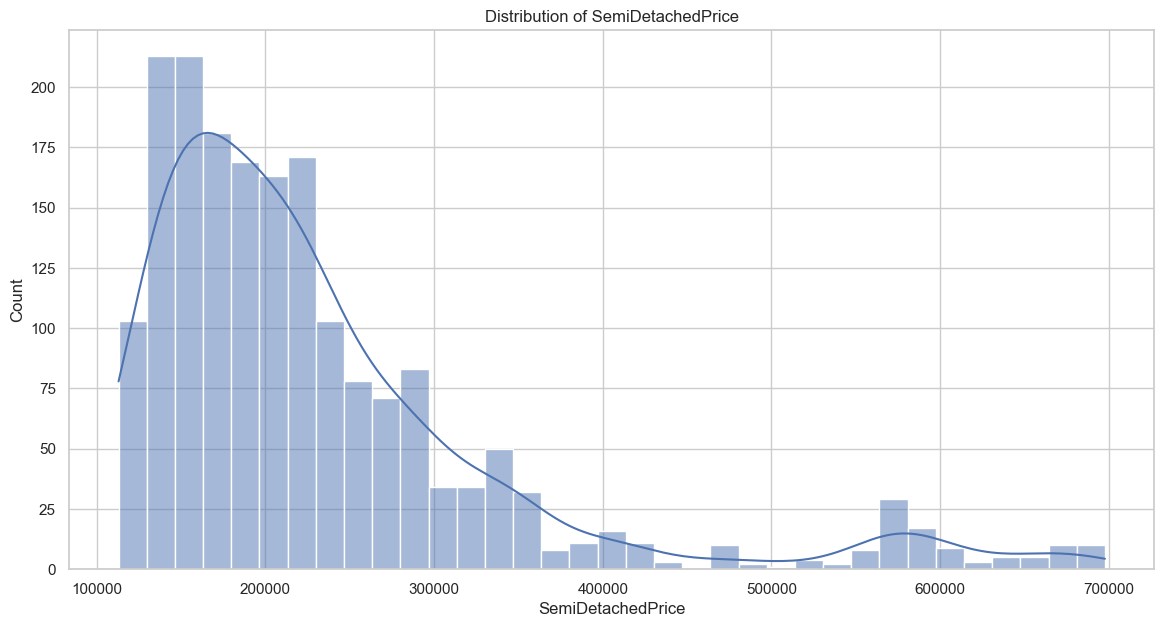

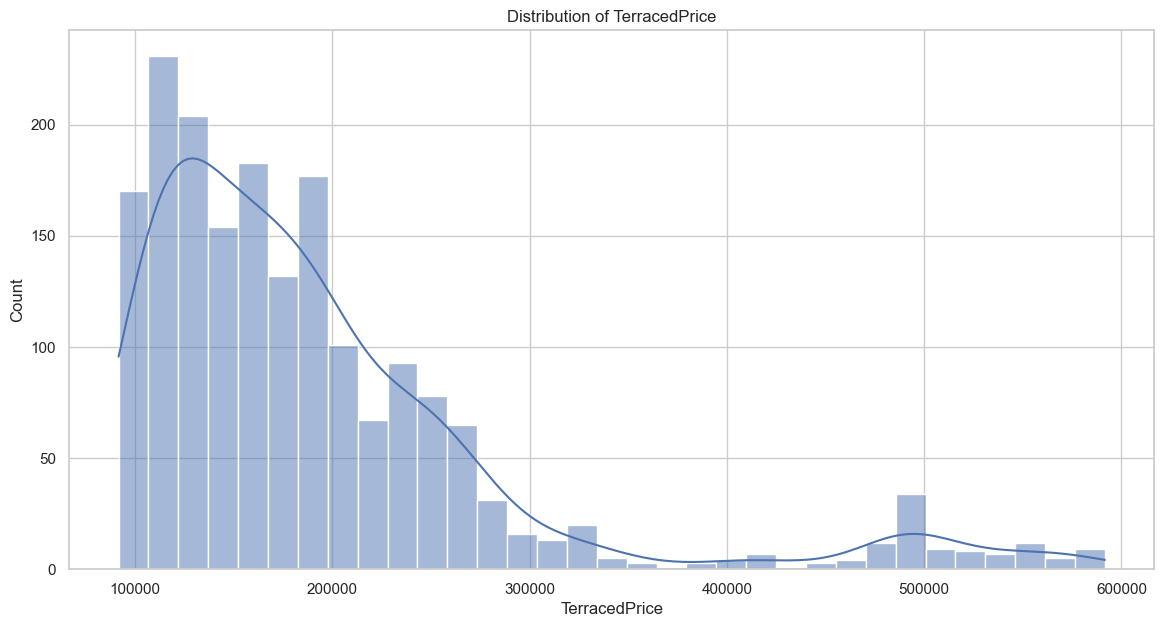

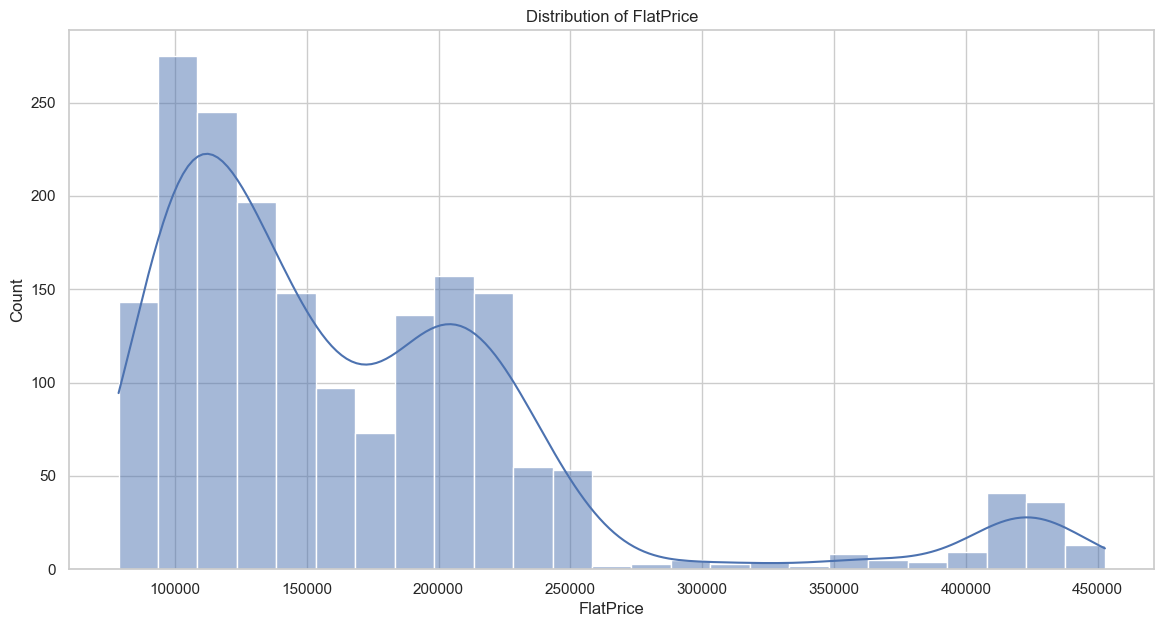

In [32]:
#Price distribution by property type 
property_types = ['DetachedPrice', 'SemiDetachedPrice','TerracedPrice','FlatPrice']
for prop in property_types:
    plt.figure(figsize= (14,7))
    sns.histplot(data=df, x=prop, kde =True)
    plt.title(f'Distribution of {prop}')
    plt.show()

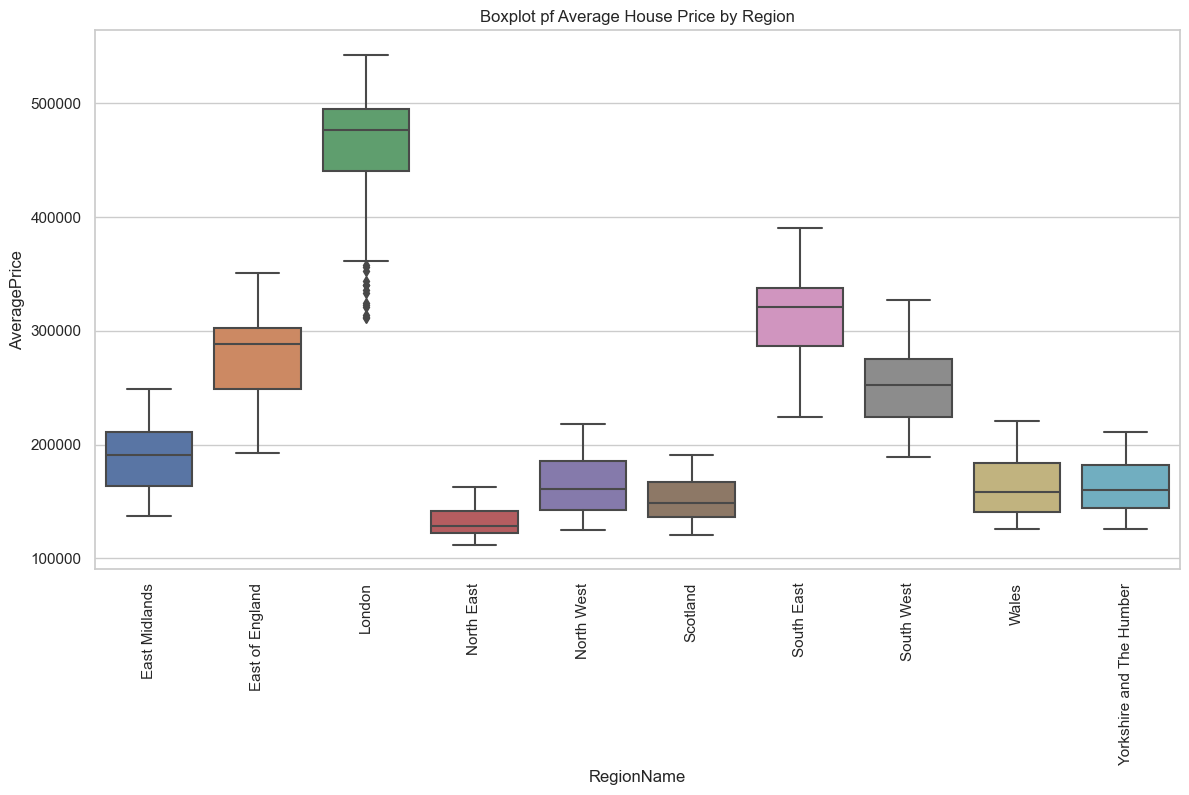

In [34]:
#Identifying outliers
plt.figure(figsize =(14,7))
sns.boxplot(data=df_standard, x='RegionName', y= 'AveragePrice')
plt.title('Boxplot pf Average House Price by Region')
plt.xticks(rotation=90)
plt.show()

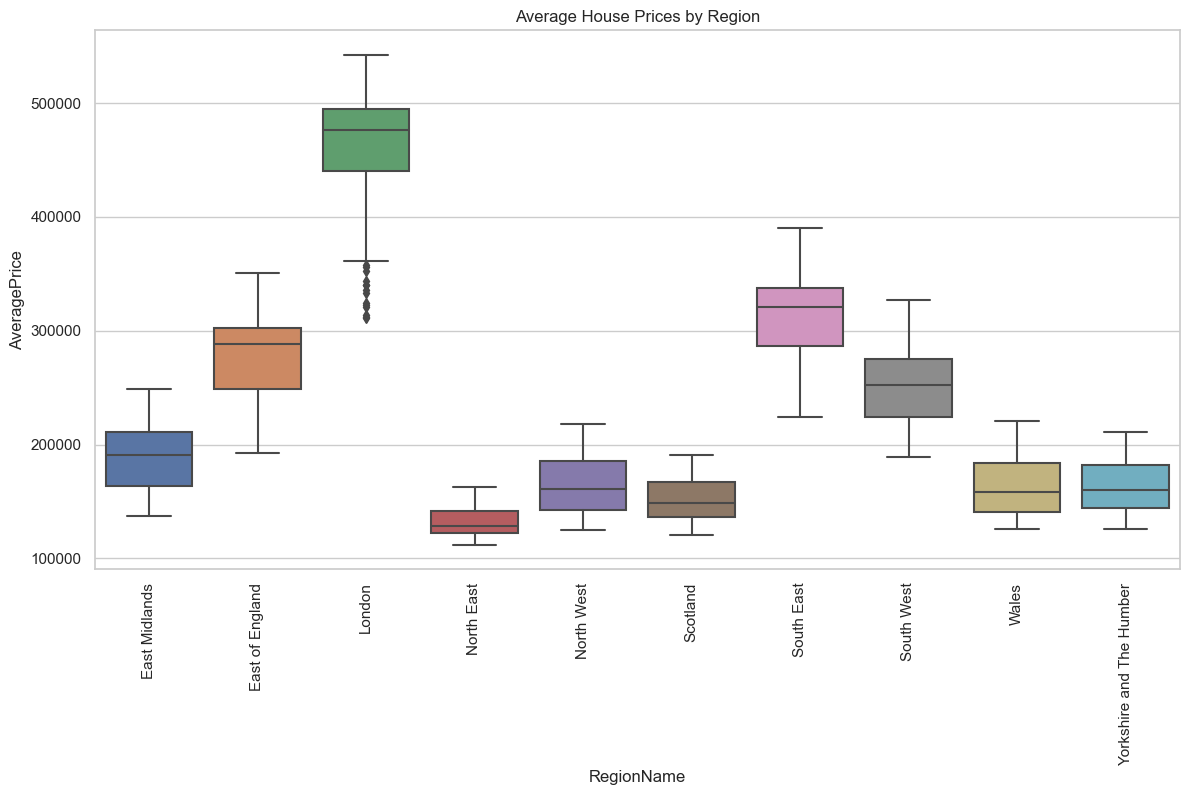

In [38]:
#Regional price comparison
plt.figure(figsize= (14,7))
sns.boxplot(data=df_standard, x= 'RegionName', y='AveragePrice')
plt.title('Average House Prices by Region')
plt.xticks(rotation=90)
plt.show

#Analysis of clustering 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

#Select relevant features for clustering 
features =df[['RegionName','AveragePrice','DetachedPrice','SemiDetachedPrice','TerracedPrice','FlatPrice']].groupby('RegionName').mean()

#Scale the features
scaler =StandardScaler()
scaled_features =scaler.fit_transform(features)

#perform K- means clustering
kmeans = KMeans(n_clusters =4, random_state=0)
clusters =kmeans.fit_predict(scaled_features)

#Add cluster labels to the original data
df['Cluster'] =df['RegionName'].map(dict(zip(features.index,clusters)))



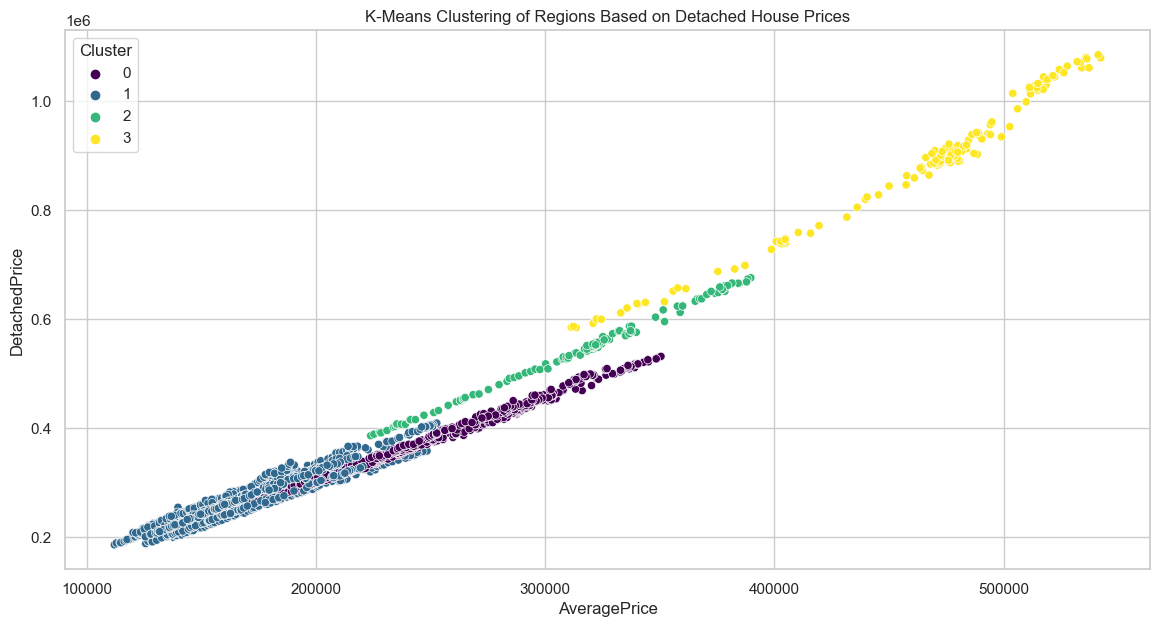

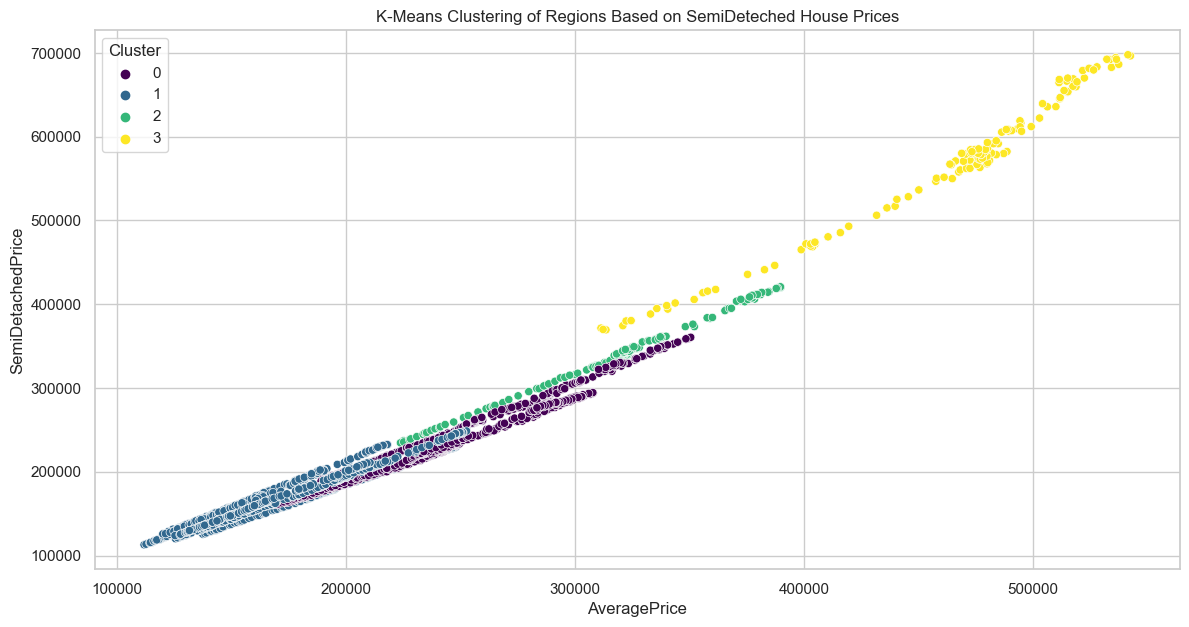

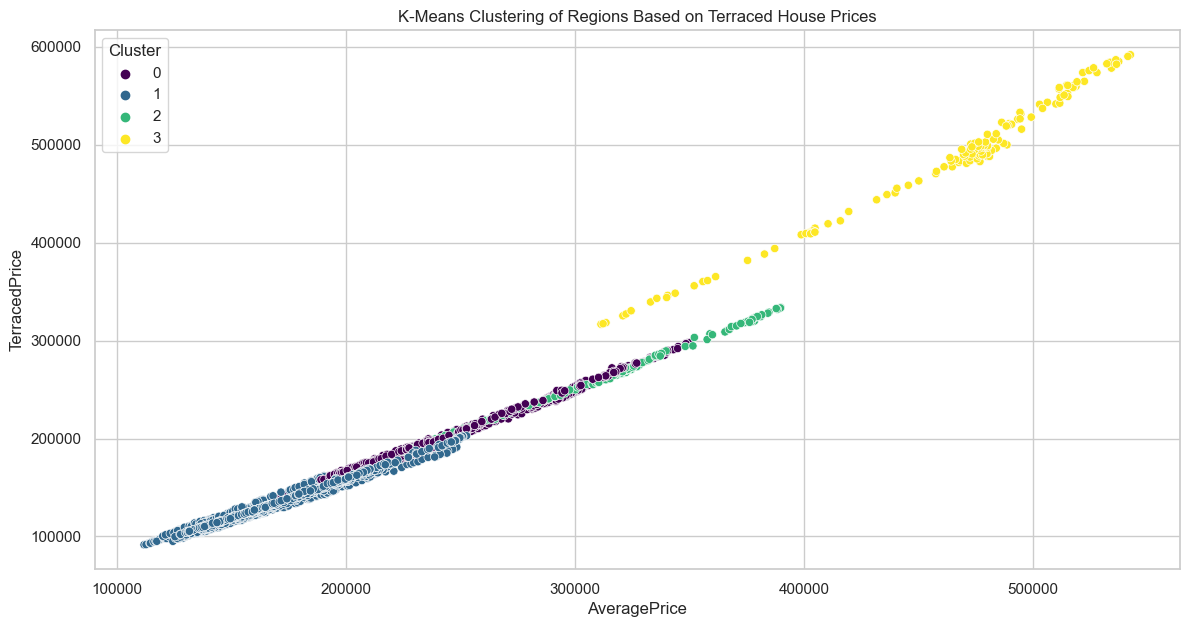

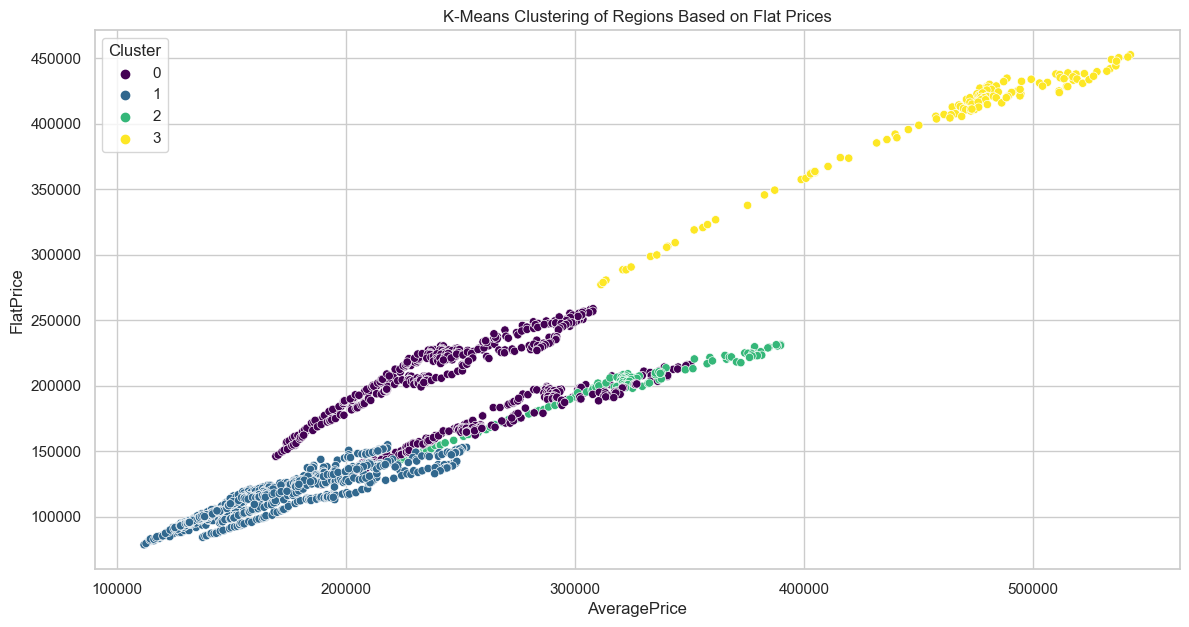

In [43]:
#Visualize clusters

plt.figure(figsize=(14,7))
sns.scatterplot (data=df, x='AveragePrice', y='DetachedPrice', hue='Cluster', palette='viridis', legend='full')
plt.title('K-Means Clustering of Regions Based on Detached House Prices') 
plt.show()

plt.figure(figsize=(14,7))
sns.scatterplot (data=df, x='AveragePrice', y='SemiDetachedPrice', hue='Cluster', palette='viridis', legend='full')
plt.title('K-Means Clustering of Regions Based on SemiDeteched House Prices') 
plt.show()

plt.figure(figsize=(14,7))
sns.scatterplot (data=df, x='AveragePrice', y='TerracedPrice', hue='Cluster', palette='viridis', legend='full')
plt.title('K-Means Clustering of Regions Based on Terraced House Prices') 
plt.show()

plt.figure(figsize=(14,7))
sns.scatterplot (data=df, x='AveragePrice', y='FlatPrice', hue='Cluster', palette='viridis', legend='full')
plt.title('K-Means Clustering of Regions Based on Flat Prices') 
plt.show()


In [44]:
#K -Means Clustering of Regions by proppert prices


#Data Preparetion -Group data by RegionName and calculate the mean of the four property 

df_cluster = df.groupby('RegionName').agg ({
    'DetachedPrice': 'mean',
    'SemiDetachedPrice': 'mean',
    'TerracedPrice': 'mean',
    'FlatPrice': 'mean',
}).reset_index()

#Data check
print(df_cluster.head())



          RegionName  DetachedPrice  SemiDetachedPrice  TerracedPrice  \
0      East Midlands  276790.837795      174623.586104  144165.949349   
1    East of England  420157.970516      283967.883356  235307.604605   
2            England  369024.398312      228643.959763  198561.959229   
3  England and Wales  360337.113153      224358.455656  194051.505702   
4      Great Britain  351378.972905      219655.477159  189163.255830   

       FlatPrice  
0  113297.669387  
1  184094.483092  
2  219214.060071  
3  216539.371386  
4  199811.122845  


                  RegionName  Cluster
0              East Midlands        0
1            East of England        2
2                    England        2
3          England and Wales        2
4              Great Britain        2
5                     London        1
6                 North East        0
7                 North West        0
8                   Scotland        0
9                 South East        3
10                South West        2
11                     Wales        0
12      West Midlands Region        0
13  Yorkshire and The Humber        0


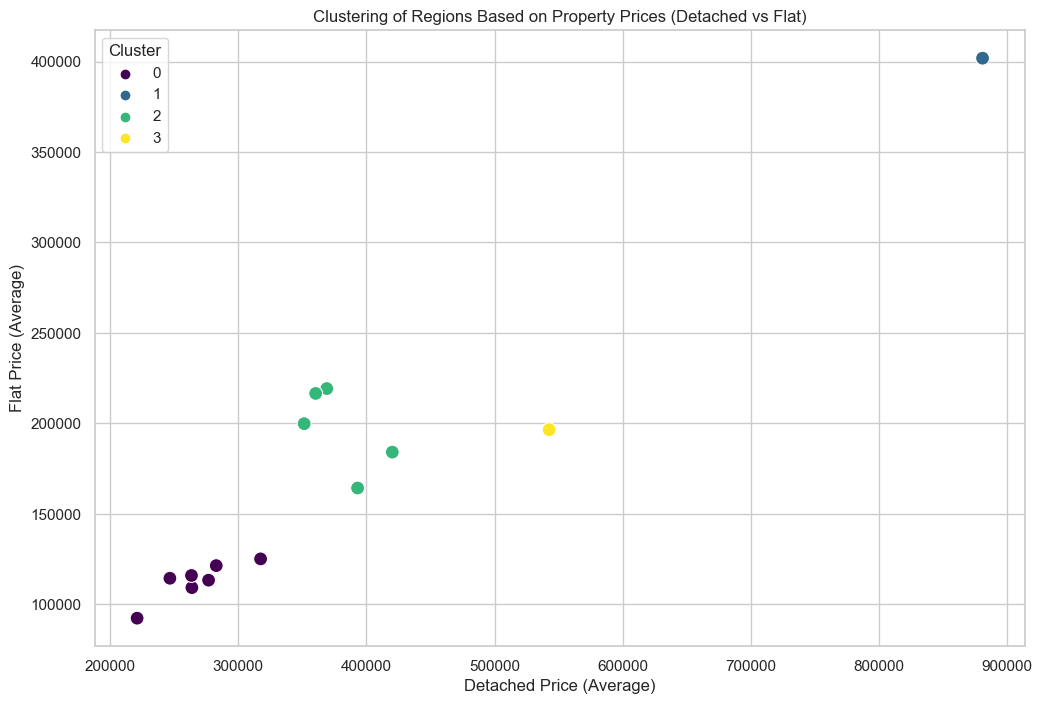

In [45]:
#Normalization-Scale the data
scaler =StandardScaler()
scaled_data =scaler.fit_transform(df_cluster[['DetachedPrice','SemiDetachedPrice','TerracedPrice','FlatPrice']])

#K-Means with 4 clusters
Kmeans =KMeans(n_clusters=4, random_state=42)

#Fit the model to the scaled data and assign clusters

df_cluster['Cluster'] =kmeans.fit_predict(scaled_data)

#Check the clusters assigned to each region
print(df_cluster[['RegionName','Cluster']])

#Visualization of Clusters

#Plot scatter plot to visualize clusters for DetachedPrice vs FlatPrice
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_cluster, x ='DetachedPrice', y='FlatPrice', hue='Cluster', palette='viridis',s=100)
plt.title('Clustering of Regions Based on Property Prices (Detached vs Flat)')
plt.xlabel('Detached Price (Average)')
plt.ylabel('Flat Price (Average)')
plt.grid(True)
plt.show()


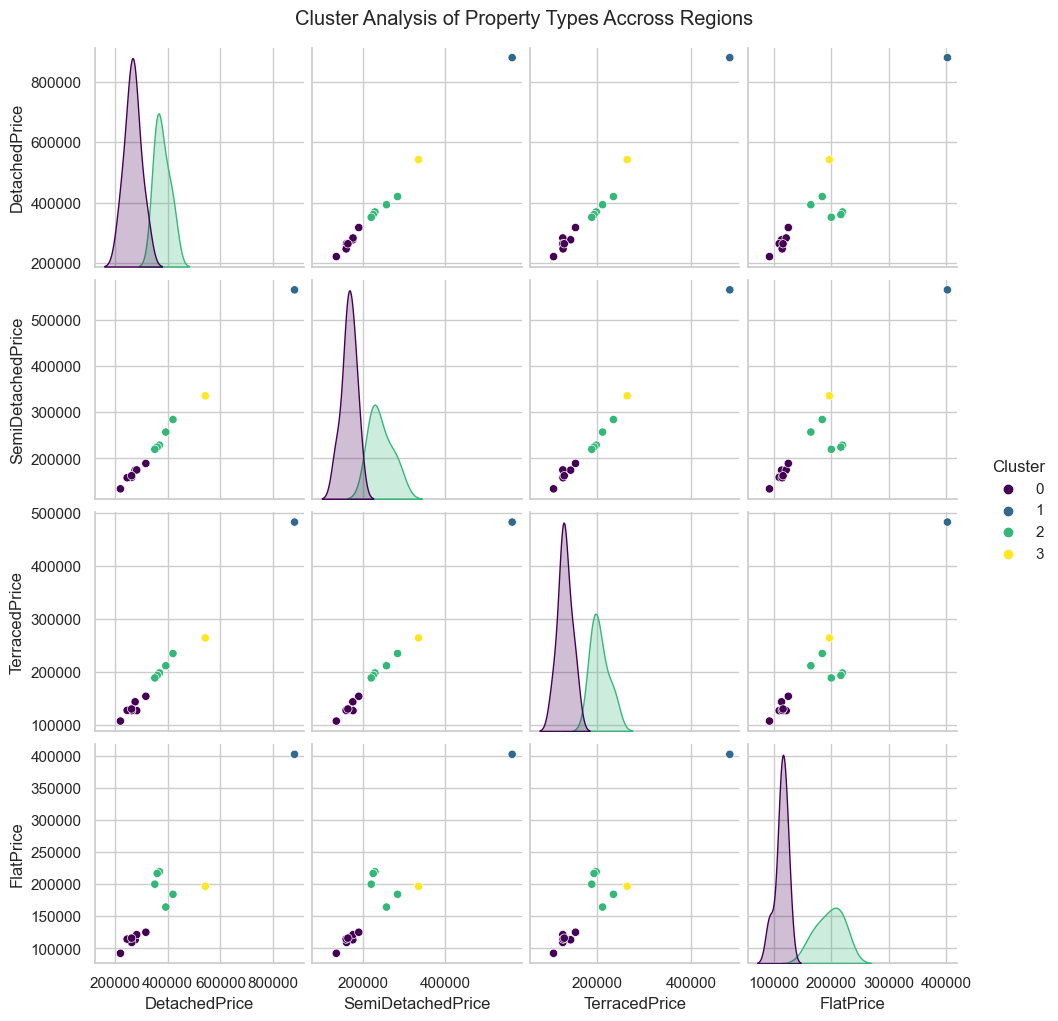

In [46]:
#pair plot to visualize all property types in clusters
sns.pairplot(df_cluster, vars=['DetachedPrice', 'SemiDetachedPrice','TerracedPrice', 'FlatPrice'], hue='Cluster', palette='viridis')
plt.suptitle('Cluster Analysis of Property Types Accross Regions', y=1.02)
plt.show()


C:\Users\Ruwan Hasitha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



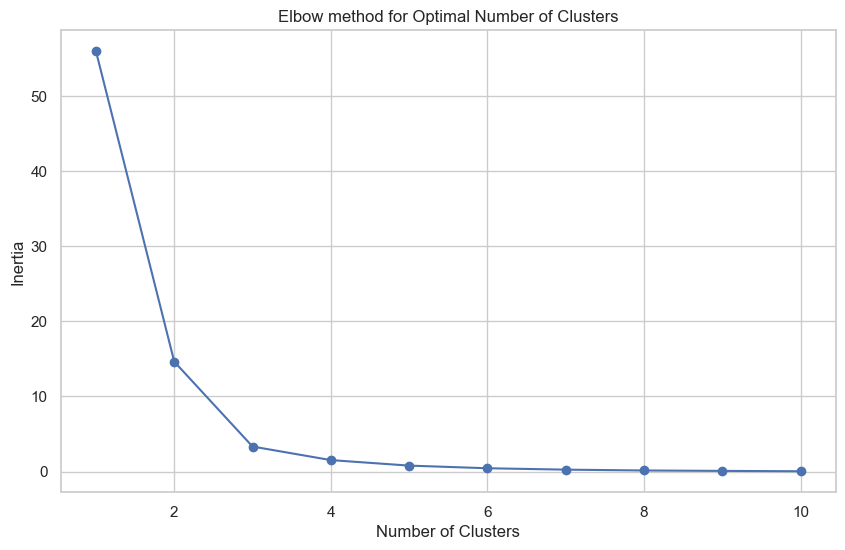

In [47]:
#Evaluate cluster performance using inertia (Elbow Method)
inertia =[]
for n in range (1,11):
    kmeans_model =KMeans(n_clusters=n ,random_state =42)
    kmeans_model.fit(scaled_data)
    inertia.append(kmeans_model.inertia_)
    
#Plot the elbow curve finf optimal number of clusters
plt.figure(figsize=(10,6))
plt.plot(range(1,11),inertia, marker ='o')
plt.title('Elbow method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [48]:
import statsmodels.api as sm
 
#Data preparation for regression
df_regression = df_filtered[['DetachedPrice', 'SemiDetachedPrice', 'TerracedPrice', 'FlatPrice', 'RegionName', 'Year']]
df_regression = pd.get_dummies(df_regression, columns=['RegionName'], drop_first=True)


#Define the dependent and independent variables

X = df_regression.drop (columns ='DetachedPrice') #Independent variable (Without detachedprice)
y = df_regression['DetachedPrice']


In [49]:
# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

In [50]:
#Print the summery of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          DetachedPrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.336e+05
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:10:23   Log-Likelihood:                -17496.
No. Observations:                1848   AIC:                         3.503e+04
Df Residuals:                    1830   BIC:                         3.513e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [51]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [52]:
#Select the time series data for DerachedPrice for particular region (Here taken region as 'London')
region_data = df[df['RegionName'] == 'London'] [['Date', 'DetachedPrice']].dropna()

#Set 'Date' as the index 
region_data['Date'] =pd.to_datetime(region_data['Date'])
region_data.set_index('Date', inplace= True)


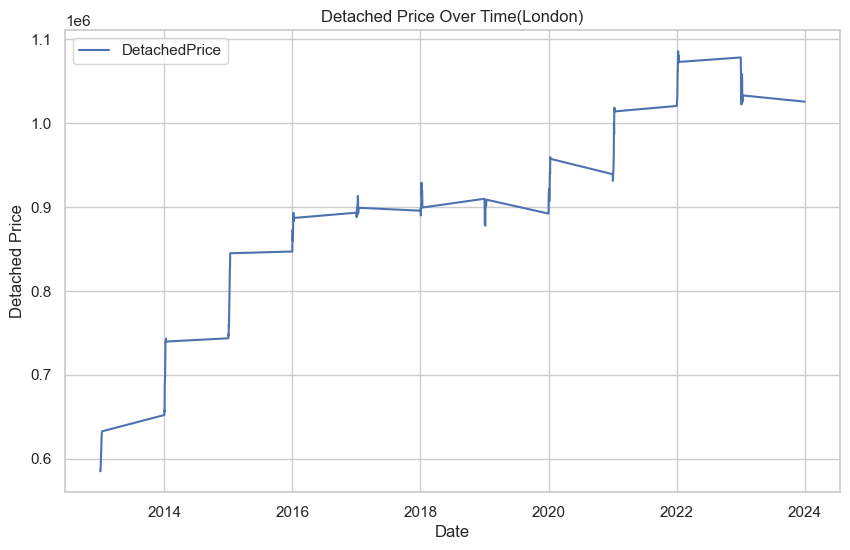

In [53]:
#plot the time series data
plt.figure(figsize = (10,6))
plt.plot(region_data['DetachedPrice'],label ='DetachedPrice')
plt.title('Detached Price Over Time(London)')
plt.xlabel('Date')
plt.ylabel('Detached Price')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
#1st Step
#Check for stationarity usinf the Augmented Dickey-Fuller Test
adf_test =adfuller(region_data['DetachedPrice'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -2.5655159170638666
p-value: 0.10033590817491272


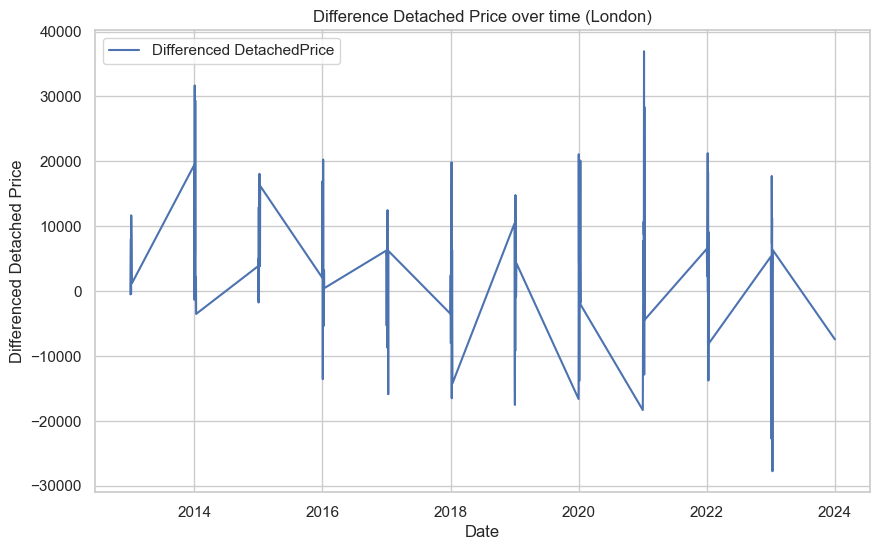

In [55]:
#2nd Step :Differencing tha data if necessary to make it stationary
#If p-value is greater than 0.05, difference the data to achieve stationarity 

if adf_test[1]> 0.05:
    region_data['DetachedPrice_diff'] = region_data['DetachedPrice'].diff().dropna()
    plt.figure(figsize=(10,6))
    plt.plot(region_data['DetachedPrice_diff'], label='Differenced DetachedPrice')
    plt.title('Difference Detached Price over time (London)')
    plt.xlabel('Date')
    plt.ylabel('Differenced Detached Price')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    region_data['DetachedPrice_diff'] = region_data['DetachedPrice']

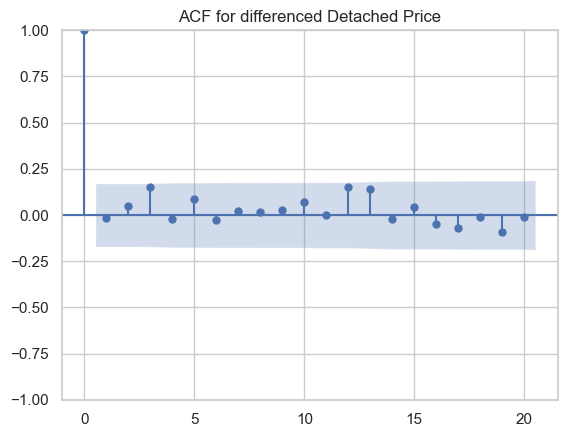

C:\Users\Ruwan Hasitha\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



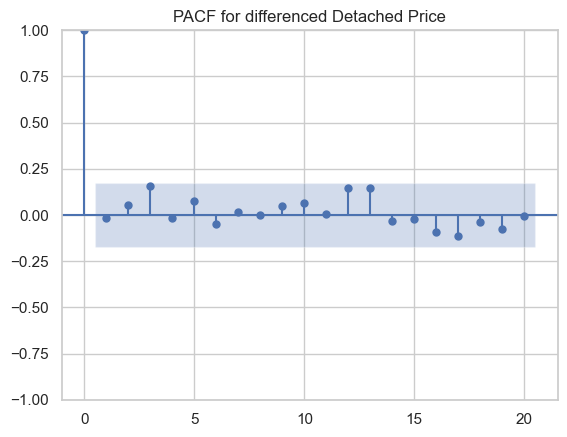

In [56]:
#3rd Step :plot SCF and PACF to determine AR and MA Terms
plot_acf(region_data['DetachedPrice_diff'].dropna(),lags =20)
plt.title('ACF for differenced Detached Price' )
plt.show()

plot_pacf(region_data['DetachedPrice_diff'].dropna(),lags =20)
plt.title('PACF for differenced Detached Price' )
plt.show()


In [57]:
#4th Step : Fit Arima Model
#Baced on the ACF and PACF Plots, can decide the p and q parameters
#p(AR Term) and q (MA Term) can be adjusted based on the plots
arema_model =ARIMA(region_data['DetachedPrice'], order=(1,0,1)) #(p,d,q)
arema_model_fit =arema_model.fit()

#5th step :ARMA Model summary 
print(arema_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          DetachedPrice   No. Observations:                  133
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1433.733
Date:                Mon, 26 Aug 2024   AIC                           2875.466
Time:                        19:10:30   BIC                           2887.028
Sample:                             0   HQIC                          2880.165
                                - 133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.808e+05   2.29e-09   3.85e+14      0.000    8.81e+05    8.81e+05
ar.L1          0.9985      0.003    304.257      0.000       0.992       1.005
ma.L1          0.0619      0.089      0.695      0.4

C:\Users\Ruwan Hasitha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Ruwan Hasitha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Ruwan Hasitha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



C:\Users\Ruwan Hasitha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



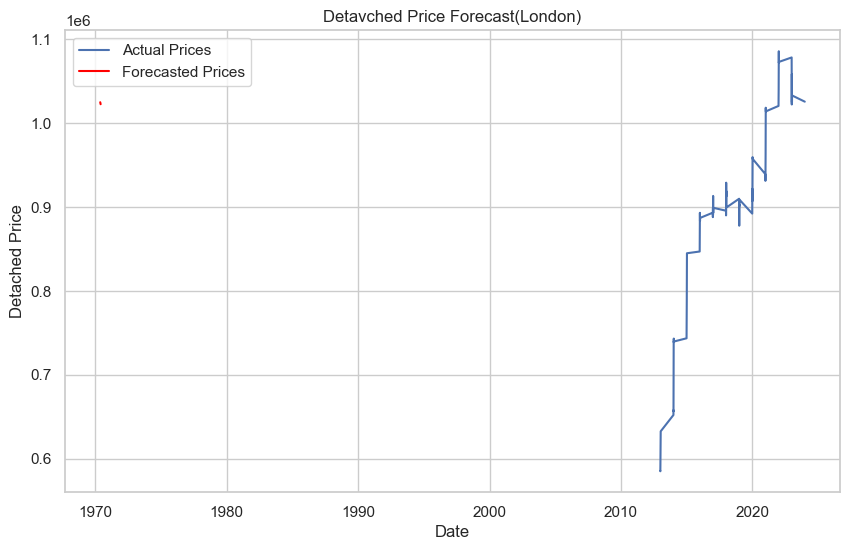

In [62]:
#6th step :Forcasting the next 12 months
forcast =arema_model_fit.forecast(steps=12)
plt.figure(figsize=(10,6))
plt.plot(region_data['DetachedPrice'],label ='Actual Prices')
plt.plot(forcast,label ='Forecasted Prices', color ='red')
plt.title('Detavched Price Forecast(London)')
plt.xlabel('Date')
plt.ylabel('Detached Price')
plt.legend()
plt.grid(True)
plt.show()

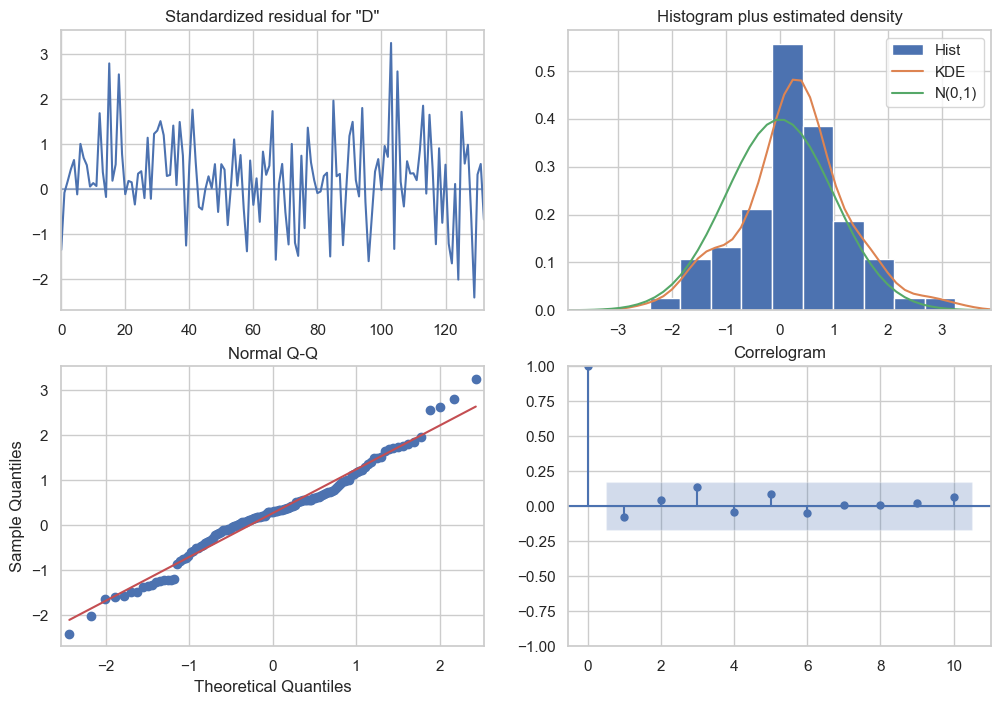

In [63]:
#7th Step :Diagnostic plots to check residuals
arema_model_fit.plot_diagnostics(figsize= (12,8))
plt.show()